In [171]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None

import matplotlib.pyplot as plt
import seaborn as sns

# I. Data Cleaning

In [172]:
df = pd.read_csv('./../datasets/main.csv')

In [173]:
df.head()

,animal_id_in,animal_type,color,breed,intake_type,outcome_type,intake_condition,outcome_subtype,datetime_in,datetime_out,...,prev_relocate,age_upon_outcome,age_upon_intake,sex_upon_intake,sex_upon_outcome,is_named_in,is_named_out,found_location,name_in,name_out
0,A006100,Dog,yellow white,spinone italiano mix,Public Assist,Return to Owner,Normal,Unknown,2014-12-19 10:21:00,2014-12-20 16:35:00,...,0,7.0,7.0,Neutered Male,Neutered Male,1,1,8700 Research Blvd in Austin (TX),Scamp,Scamp
1,A006100,Dog,yellow white,spinone italiano mix,Public Assist,Return to Owner,Normal,Unknown,2014-03-07 14:26:00,2014-03-08 17:10:00,...,0,6.0,6.0,Neutered Male,Neutered Male,1,1,8700 Research in Austin (TX),Scamp,Scamp
2,A047759,Dog,tricolor,dachshund,Owner Surrender,Transfer,Normal,Partner,2014-04-02 15:55:00,2014-04-07 15:12:00,...,0,1.0,1.0,Neutered Male,Neutered Male,1,1,Austin (TX),Oreo,Oreo
3,A134067,Dog,brown white,sheepdog shetland,Public Assist,Return to Owner,Injured,Unknown,2013-11-16 09:02:00,2013-11-16 11:54:00,...,0,1.0,1.0,Neutered Male,Neutered Male,1,1,12034 Research Blvd in Austin (TX),Bandit,Bandit
4,A141142,Dog,white black,retriever labrador bull pit,Stray,Return to Owner,Aged,Unknown,2013-11-16 14:46:00,2013-11-17 11:40:00,...,0,1.0,1.0,Spayed Female,Spayed Female,1,1,Austin (TX),Bettie,Bettie


### Creating Adoption DataFrame

In [174]:
adopted = df[df['outcome_type']== 'Adoption']
adopted.head()

,animal_id_in,animal_type,color,breed,intake_type,outcome_type,intake_condition,outcome_subtype,datetime_in,datetime_out,...,prev_relocate,age_upon_outcome,age_upon_intake,sex_upon_intake,sex_upon_outcome,is_named_in,is_named_out,found_location,name_in,name_out
12,A200922,Dog,tan black,mix dachshund,Owner Surrender,Adoption,Normal,Foster,2013-10-03 15:47:00,2013-11-22 09:44:00,...,0,1.0,1.0,Neutered Male,Neutered Male,1,1,Austin (TX),Carlos,Carlos
14,A210457,Dog,tan black,chihuahua shorthair,Public Assist,Adoption,Aged,Foster,2016-09-28 12:05:00,2016-10-07 12:34:00,...,0,1.0,1.0,Neutered Male,Neutered Male,1,1,4424 S Mopac #412 in Austin (TX),Caleb,Caleb
23,A226069,Dog,white sable,beagle labrador retriever,Stray,Adoption,Normal,Foster,2015-10-06 12:29:00,2015-10-29 15:00:00,...,0,1.0,1.0,Neutered Male,Neutered Male,1,1,Wheless Ln And Berkman Dr in Austin (TX),Cedar,Cedar
33,A249087,Dog,brown black,mix shepherd german,Stray,Adoption,Normal,Foster,2016-08-17 14:05:00,2016-11-15 10:37:00,...,0,1.0,1.0,Spayed Female,Spayed Female,1,1,E 6Th St And Pedernales in Austin (TX),*Polly,*Polly
49,A274546,Dog,tricolor,mix pointer,Stray,Adoption,Normal,Unknown,2013-11-13 18:16:00,2013-11-16 12:24:00,...,0,1.0,1.0,Spayed Female,Spayed Female,1,1,Manchaca And Slaughter in Austin (TX),Sophie,Sophie


In [175]:
adopted['animal_type'].value_counts()

Dog          34240
Cat          22089
Other          573
Bird           206
Livestock        8
Name: animal_type, dtype: int64

**Example**

In [176]:
adopted[adopted['breed'].str.contains("pit")]['breed'].value_counts()

pit bull mix                                       3362
bull pit                                            652
retriever labrador bull pit                         245
pit american terrier bull mix                       151
boxer bull pit                                       73
                                                   ... 
pit american staffordshire bull terrier               1
pit dog australian american cattle bull terrier       1
pit american hound bull terrier basset                1
pit kelpie australian american bull terrier           1
pit bull corgi welsh pembroke                         1
Name: breed, Length: 77, dtype: int64

It appears that there are 77 different types of pitbulls.

### Creating new binary 'mix' column

In [177]:
adopted['mix'] = adopted['breed'].str.contains("mix").astype(int)

In [178]:
adopted.head()

,animal_id_in,animal_type,color,breed,intake_type,outcome_type,intake_condition,outcome_subtype,datetime_in,datetime_out,...,age_upon_outcome,age_upon_intake,sex_upon_intake,sex_upon_outcome,is_named_in,is_named_out,found_location,name_in,name_out,mix
12,A200922,Dog,tan black,mix dachshund,Owner Surrender,Adoption,Normal,Foster,2013-10-03 15:47:00,2013-11-22 09:44:00,...,1.0,1.0,Neutered Male,Neutered Male,1,1,Austin (TX),Carlos,Carlos,1
14,A210457,Dog,tan black,chihuahua shorthair,Public Assist,Adoption,Aged,Foster,2016-09-28 12:05:00,2016-10-07 12:34:00,...,1.0,1.0,Neutered Male,Neutered Male,1,1,4424 S Mopac #412 in Austin (TX),Caleb,Caleb,0
23,A226069,Dog,white sable,beagle labrador retriever,Stray,Adoption,Normal,Foster,2015-10-06 12:29:00,2015-10-29 15:00:00,...,1.0,1.0,Neutered Male,Neutered Male,1,1,Wheless Ln And Berkman Dr in Austin (TX),Cedar,Cedar,0
33,A249087,Dog,brown black,mix shepherd german,Stray,Adoption,Normal,Foster,2016-08-17 14:05:00,2016-11-15 10:37:00,...,1.0,1.0,Spayed Female,Spayed Female,1,1,E 6Th St And Pedernales in Austin (TX),*Polly,*Polly,1
49,A274546,Dog,tricolor,mix pointer,Stray,Adoption,Normal,Unknown,2013-11-13 18:16:00,2013-11-16 12:24:00,...,1.0,1.0,Spayed Female,Spayed Female,1,1,Manchaca And Slaughter in Austin (TX),Sophie,Sophie,1


### Creating new 'days_in_shelter' column.

In [179]:
adopted[['datetime_in','datetime_out']] = adopted[['datetime_in','datetime_out']].apply(pd.to_datetime)
adopted['days_in_shelter'] = (adopted['datetime_out'] - adopted['datetime_in']).dt.days

In [263]:
df[['datetime_in','datetime_out']] = df[['datetime_in','datetime_out']].apply(pd.to_datetime)
df['days_in_shelter'] = (df['datetime_out'] - df['datetime_in']).dt.days

In [181]:
#Cleaning up
adopted.drop(columns = ['animal_id_in', 'outcome_type','outcome_subtype', 'year_out', 'month_out', 
                        'day_out', 'datetime_out','name_out', 'is_named_out','sex_upon_outcome', 
                        'age_upon_outcome', 'name_in','found_location', 'datetime_in'], inplace=True)

# II. EDA

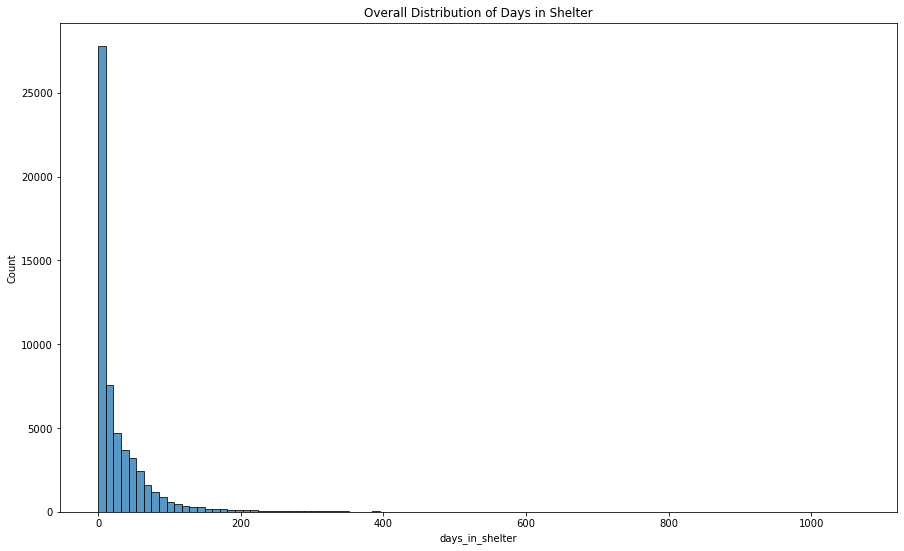

In [267]:
plt.figure(figsize=(15,9))
sns.histplot(data=adopted, bins=100, x="days_in_shelter").set(title='Overall Distribution of Days in Shelter')
plt.show()

/Users/ksylvia/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


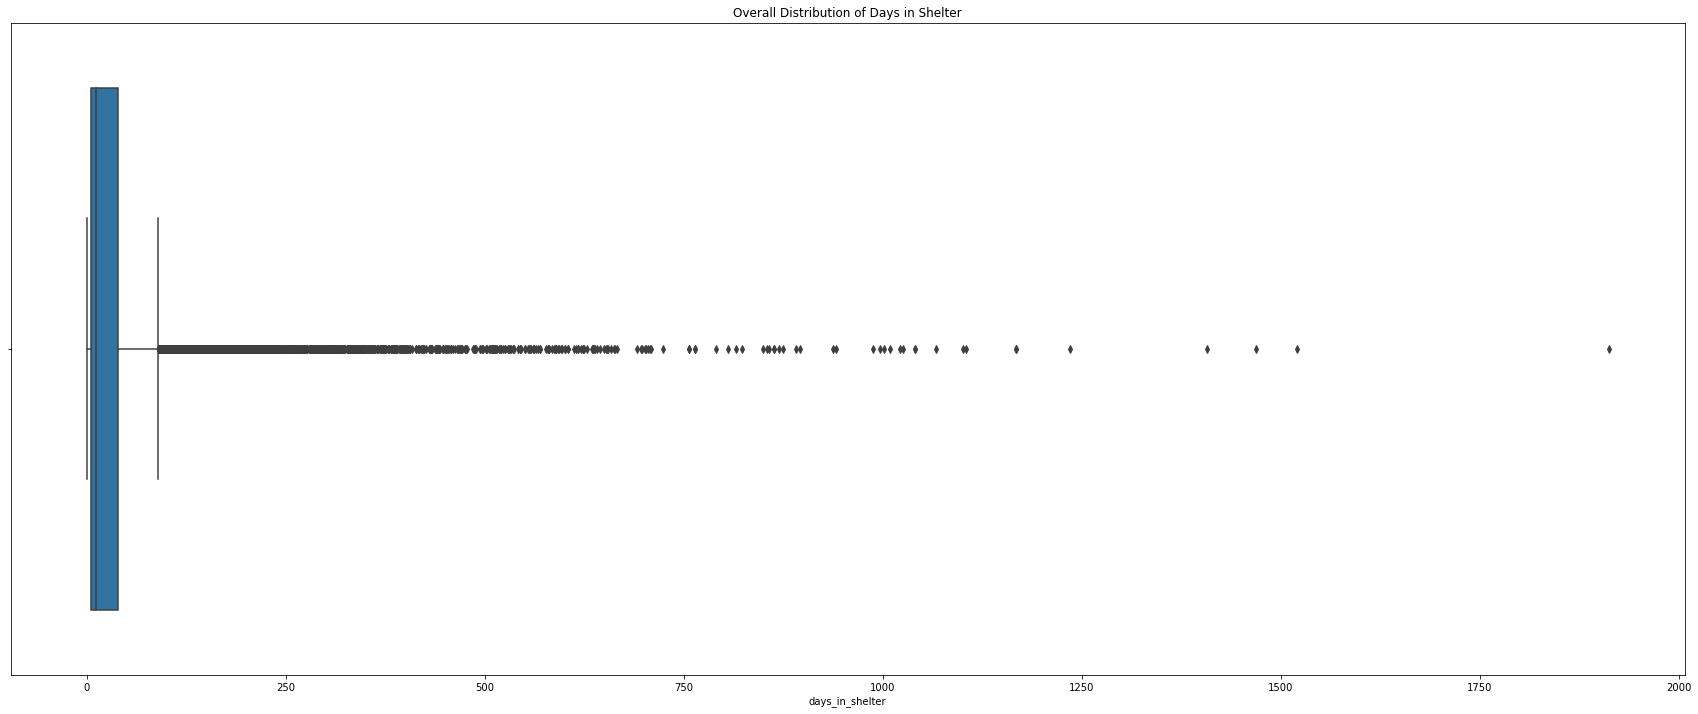

In [183]:
plt.figure(figsize=(30,12))
sns.boxplot(adopted['days_in_shelter']).set(title = 'Overall Distribution of Days in Shelter')
plt.show();

In [184]:
adopted['days_in_shelter'].mean()

32.206422018348626

In [185]:
#Identifying amount of animals over 3 years in shelter
len(adopted.index[(adopted['days_in_shelter']> 1095)])

9

In [186]:
#Removing outliers of animals in shelter longer than 3 years
adopted.drop(adopted.index[(adopted['days_in_shelter']> 1095)], axis=0, inplace=True)

In [187]:
# As expected, overall mean decreased slightly
adopted['days_in_shelter'].mean()

31.99989493407113

### Understanding Data Types

In [188]:
num_cols = adopted.select_dtypes(exclude='object').columns
cat_cols = adopted.select_dtypes(include='object').columns

print(f'The numerical columns are: {num_cols}.')
print(f'The categorical columns are: {cat_cols}.')

The numerical columns are: Index(['year_in', 'month_in', 'prev_adoption', 'prev_transfer',
       'prev_ret_to_owner', 'prev_rto_adopt', 'prev_disposal', 'prev_missing',
       'prev_relocate', 'age_upon_intake', 'is_named_in', 'mix',
       'days_in_shelter'],
      dtype='object').
The categorical columns are: Index(['animal_type', 'color', 'breed', 'intake_type', 'intake_condition',
       'day_in', 'sex_upon_intake'],
      dtype='object').


In [189]:
# Changing year_in, month_in to categorical
adopted['year_in'] = adopted['year_in'].astype(str)
adopted['month_in'] = adopted['month_in'].astype(str)

In [190]:
num_cols = adopted.select_dtypes(exclude='object').columns
cat_cols = adopted.select_dtypes(include='object').columns

print(f'The numerical columns are: {num_cols}.')
print(f'The categorical columns are: {cat_cols}.')

The numerical columns are: Index(['prev_adoption', 'prev_transfer', 'prev_ret_to_owner', 'prev_rto_adopt',
       'prev_disposal', 'prev_missing', 'prev_relocate', 'age_upon_intake',
       'is_named_in', 'mix', 'days_in_shelter'],
      dtype='object').
The categorical columns are: Index(['animal_type', 'color', 'breed', 'intake_type', 'intake_condition',
       'year_in', 'month_in', 'day_in', 'sex_upon_intake'],
      dtype='object').


### Further Investigating

In [191]:
for col in cat_cols:
    print(adopted[col].value_counts())

Dog          34235
Cat          22085
Other          573
Bird           206
Livestock        8
Name: animal_type, dtype: int64
white black                8100
black                      4533
brown tabby                3282
brown white                3120
tan white                  2833
                           ... 
blue torbie tabby             1
brown chocolate merle         1
brown black smoke             1
point lilac black             1
brown tiger cream tabby       1
Name: color, Length: 303, dtype: int64
domestic shorthair mix                13771
domestic shorthair                     4004
retriever labrador mix                 3637
pit bull mix                           3360
chihuahua shorthair mix                2983
                                      ...  
lop-amer mix fuzzy                        1
yorkshire silky terrier                   1
sharpei shepherd anatol chinese           1
collie smooth corgi welsh pembroke        1
pomeranian papillon                       

In [192]:
for col in cat_cols:
    temp = adopted['days_in_shelter'].groupby(adopted[col]).mean()
    print(temp)

animal_type
Bird          13.470874
Cat           39.509214
Dog           27.368190
Livestock    168.750000
Other         24.052356
Name: days_in_shelter, dtype: float64
color
agouti                  27.692308
apricot                  8.333333
black                   38.672844
black buff              14.642857
black sable             10.842105
                          ...    
yellow gold             41.000000
yellow gray              9.200000
yellow orange           26.000000
yellow white            19.164835
yellow white brindle    28.000000
Name: days_in_shelter, Length: 303, dtype: float64
breed
abyssinian                       12.000000
abyssinian domestic shorthair    36.000000
abyssinian mix                   69.000000
affenpinscher                     6.000000
affenpinscher border terrier      5.000000
                                   ...    
yorkshire rat terrier            63.200000
yorkshire silky terrier           5.000000
yorkshire terrier                13.806452
yorksh

### Questions Formed From Above:
>If the Sex Upon Intake is unknown, is it because the animal was adopted quickly and was not documented?

>If we are trying to help make predictions for future adoptions, is year_in needed/wanted?

In [193]:
df['sex_upon_intake'].value_counts()

Intact Male      41493
Intact Female    39346
Neutered Male    19514
Spayed Female    16650
Unknown          10141
Name: sex_upon_intake, dtype: int64

In [194]:
# Get indexes where name column has value Unknown
indexNames = adopted[adopted['sex_upon_intake'] == 'Unknown'].index 
# Delete these row indexes from dataFrame
adopted.drop(indexNames , inplace=True)

In [195]:
adopted['sex_upon_intake'].value_counts()

Intact Male      21259
Intact Female    20845
Neutered Male     7485
Spayed Female     7342
Name: sex_upon_intake, dtype: int64

In [196]:
# As expected, overall mean increased slightly
adopted['days_in_shelter'].mean()

32.06969840684337

In [197]:
adopted.drop(columns='year_in', inplace=True)

### Bar Charts

In [198]:
interest_cols = ['animal_type','intake_type', 'intake_condition', 'day_in', 'month_in','sex_upon_intake']

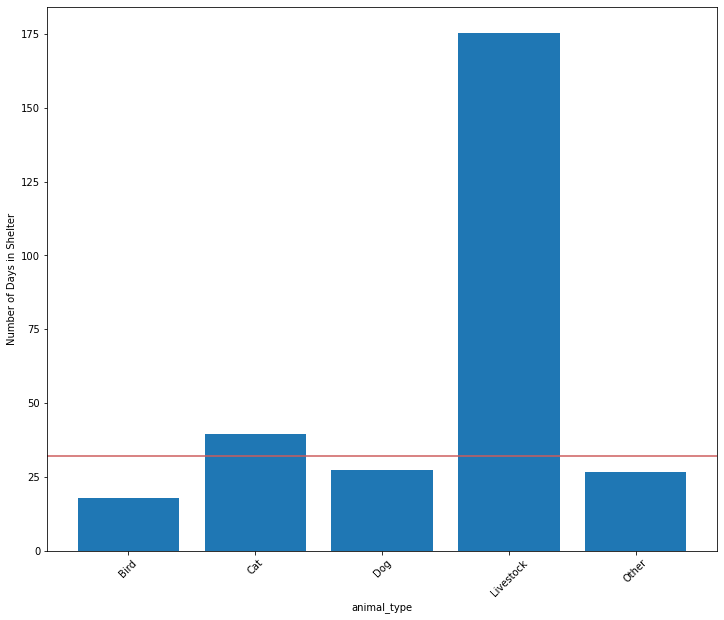

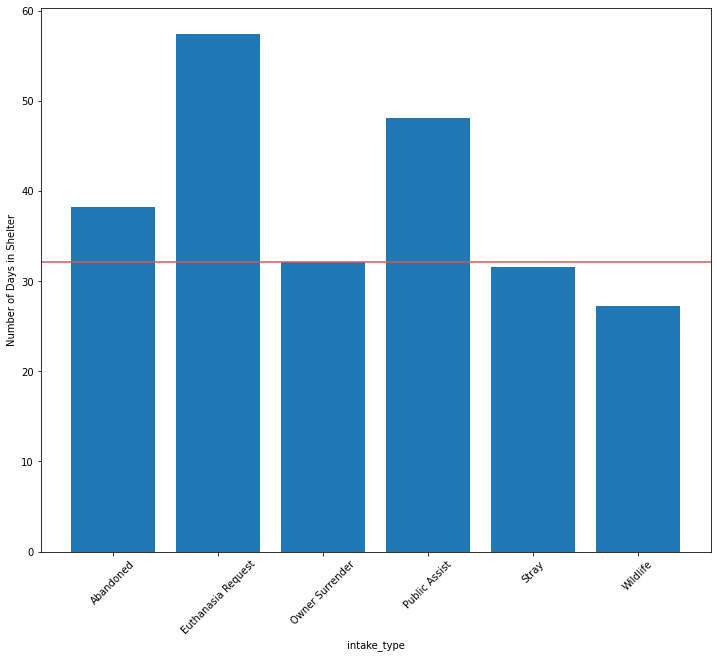

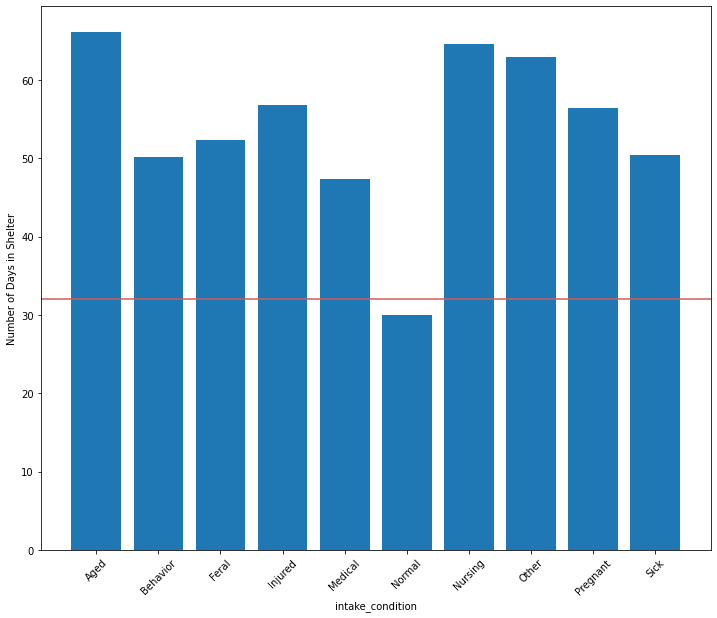

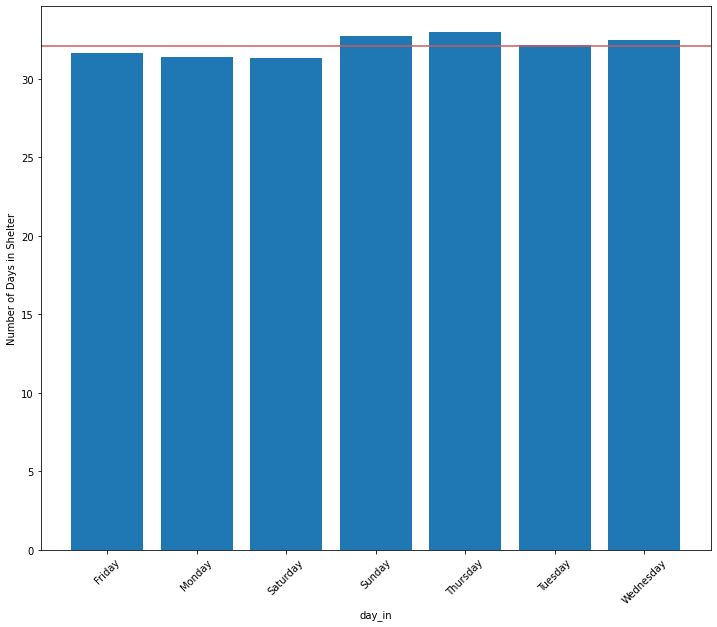

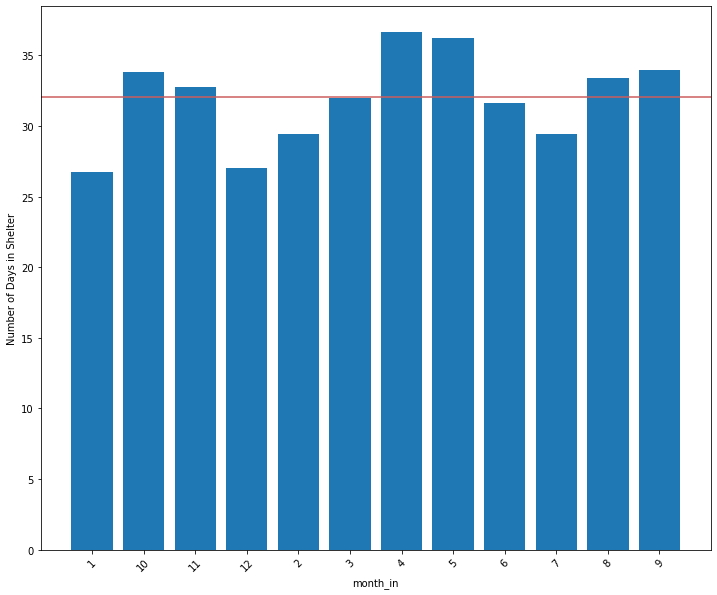

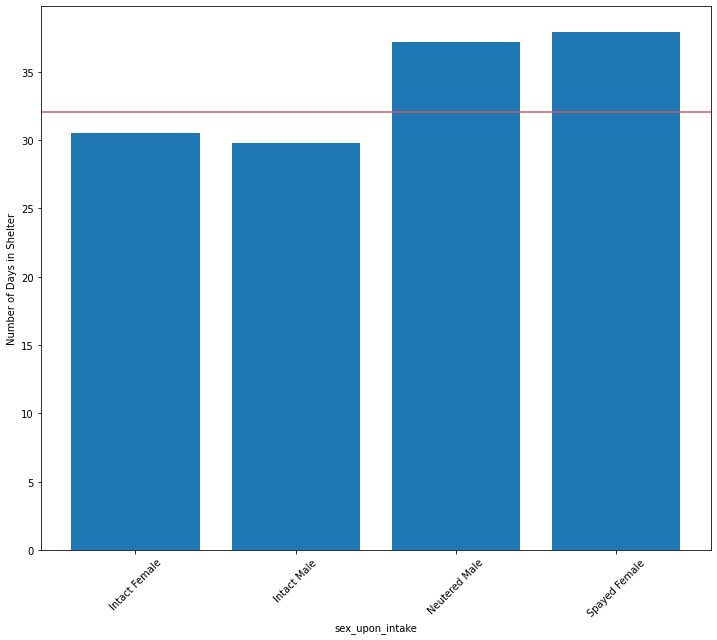

In [199]:
for col in interest_cols:
    col_series = adopted['days_in_shelter'].groupby(adopted[col]).mean()
    index = [index for index,value in col_series.items()]
    mean = [value for index,value in col_series.items()]
    plt.figure(figsize=(12,10))
    plt.bar(index,mean)
    plt.xticks(rotation=45)
    plt.axhline(y=adopted['days_in_shelter'].mean(), color='indianred')
    plt.xlabel(col)
    plt.ylabel('Number of Days in Shelter')
    plt.show();

### Heatmap

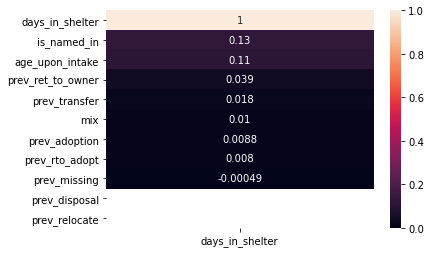

In [200]:
# Heatmap BEFORE getting dummies
sns.heatmap(adopted.corr()[['days_in_shelter']].sort_values('days_in_shelter', ascending=False), annot=True);

The null correlations are of interest to me. I will investigate this further.

In [201]:
print(df['prev_disposal'].value_counts())
print(adopted['prev_disposal'].value_counts())
print('---')
print(df['prev_relocate'].value_counts())
print(adopted['prev_relocate'].value_counts())

0    127142
1         2
Name: prev_disposal, dtype: int64
0    56931
Name: prev_disposal, dtype: int64
---
0    127144
Name: prev_relocate, dtype: int64
0    56931
Name: prev_relocate, dtype: int64


### Question Formed From Above:
> If the original data frame only has zeroes for prev_disposal, get rid of that column?

In [202]:
adopted.drop(columns=['prev_disposal', 'prev_relocate'], inplace=True)

### Pairplot

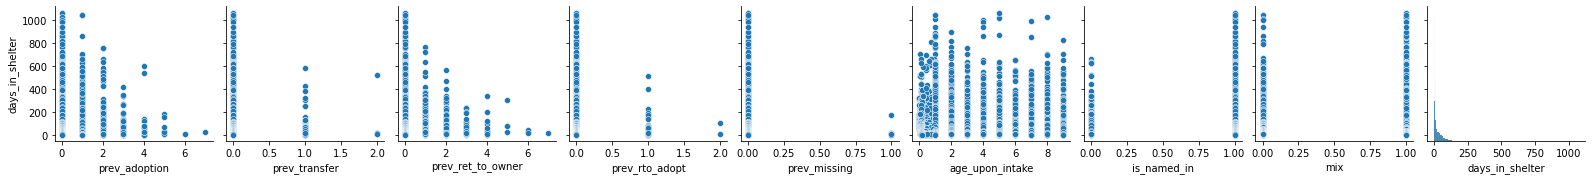

In [204]:
num_cols = adopted.select_dtypes(exclude='object').columns
sns.pairplot(x_vars=num_cols, y_vars=['days_in_shelter'],data=adopted);

### Getting Dummies

In [206]:
adopted = pd.get_dummies(adopted)

In [207]:
adopted

,prev_adoption,prev_transfer,prev_ret_to_owner,prev_rto_adopt,prev_missing,age_upon_intake,is_named_in,mix,days_in_shelter,animal_type_Bird,...,day_in_Monday,day_in_Saturday,day_in_Sunday,day_in_Thursday,day_in_Tuesday,day_in_Wednesday,sex_upon_intake_Intact Female,sex_upon_intake_Intact Male,sex_upon_intake_Neutered Male,sex_upon_intake_Spayed Female
12,0,0,0,0,0,1.000,1,1,49,0,...,0,0,0,1,0,0,0,0,1,0
14,0,0,0,0,0,1.000,1,0,9,0,...,0,0,0,0,0,1,0,0,1,0
23,0,0,0,0,0,1.000,1,0,23,0,...,0,0,0,0,1,0,0,0,1,0
33,0,0,0,0,0,1.000,1,1,89,0,...,0,0,0,0,0,1,0,0,0,1
49,0,0,0,0,0,1.000,1,1,2,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127099,0,0,0,0,0,0.083,1,1,3,0,...,0,0,0,0,1,0,0,1,0,0
127100,0,0,0,0,0,0.083,1,1,3,0,...,0,0,0,0,1,0,1,0,0,0
127102,0,0,0,0,0,0.083,1,1,2,0,...,0,0,0,0,1,0,0,1,0,0
127114,0,0,0,0,0,2.000,1,0,3,0,...,0,0,0,0,0,1,0,0,1,0


# III. Modeling

In [211]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score, train_test_split

In [223]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [209]:
features = (adopted.drop(columns = ['days_in_shelter']).columns)
X = adopted[features]
y = adopted['days_in_shelter']

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [213]:
from sklearn.preprocessing import StandardScaler

# Instantiate
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

**Linear Regression**

In [226]:
linreg = LinearRegression()
linreg.fit(X_train_sc, y_train)

LinearRegression()

In [227]:
print(" Lin Reg ".center(18, "="))
print(linreg.score(X_train_sc, y_train))
print(linreg.score(X_test_sc, y_test))

==== Lin Reg =====
0.12499418076826763
-1.4811255794956625e+25


In [228]:
predictions = linreg.predict(X_test_sc)
rmse(predictions, y_test)

218749522642172.28

**Ridge**

In [218]:
ridge_model = Ridge()
ridge_model.fit(X_train_sc, y_train)

print(" Ridge ".center(18, "="))
print(ridge_model.score(X_train_sc, y_train))
print(ridge_model.score(X_test_sc, y_test))

===== Ridge ======
0.132949778956728
0.06376127434802115


In [224]:
predictions = ridge_model.predict(X_test_sc)
rmse(predictions, y_test)

54.99769309918691

**Lasso**

In [219]:
lasso = Lasso()
lasso.fit(X_train_sc, y_train);

print(" Lasso ".center(18, "="))
print(lasso.score(X_train_sc, y_train))
print(lasso.score(X_test_sc, y_test))

===== Lasso ======
0.08914327689254908
0.07577743018723193


In [229]:
predictions = lasso.predict(X_test_sc)
rmse(predictions, y_test)

54.64361939705551

**ElasticNet**

In [220]:
from sklearn.linear_model import ElasticNet

enet_model = ElasticNet()
enet_model = enet_model.fit(X_train_sc, y_train)

print(" ElasticNet ".center(18, "="))
print(enet_model.score(X_train_sc, y_train))
print(enet_model.score(X_test_sc, y_test))

=== ElasticNet ===
0.0917201628449783
0.07215258115348677


In [231]:
predictions = enet_model.predict(X_test_sc)
rmse(predictions, y_test)

55.49482696949972

In [222]:
coef = (dict(list(zip(X_train.columns, lasso.coef_))))
{k: v for k, v in sorted(coef.items(), key=lambda item: item[1])}

{'intake_condition_Normal': -5.21630680856404,
 'animal_type_Dog': -1.83152883331196,
 'breed_chihuahua shorthair mix': -0.9798183425734884,
 'intake_type_Owner Surrender': -0.6533674874911114,
 'color_white': -0.3505954316986084,
 'month_in_1': -0.3337780895955025,
 'breed_poodle miniature mix': -0.23890044696833146,
 'breed_yorkshire mix terrier': -0.031147859400560182,
 'month_in_12': -0.02296080796343016,
 'prev_adoption': 0.0,
 'prev_rto_adopt': 0.0,
 'prev_missing': -0.0,
 'mix': -0.0,
 'animal_type_Bird': -0.0,
 'animal_type_Other': 0.0,
 'color_agouti': -0.0,
 'color_apricot': -0.0,
 'color_black buff': -0.0,
 'color_black sable': -0.0,
 'color_black silver': -0.0,
 'color_black smoke': 0.0,
 'color_blue': -0.0,
 'color_blue black': 0.0,
 'color_blue calico': -0.0,
 'color_blue chocolate tick': -0.0,
 'color_blue cream': 0.0,
 'color_blue cream calico': -0.0,
 'color_blue cream tabby': 0.0,
 'color_blue fawn': 0.0,
 'color_blue gray': 0.0,
 'color_blue gray smoke': 0.0,
 'color

# III. More DataFrames

In [246]:
dog = df[df['outcome_type']== 'Adoption']
dog = dog[dog['animal_type']== 'Dog']

cat = df[df['outcome_type']== 'Adoption']
cat = cat[cat['animal_type']== 'Cat']

In [247]:
dog

,animal_id_in,animal_type,color,breed,intake_type,outcome_type,intake_condition,outcome_subtype,datetime_in,datetime_out,...,prev_relocate,age_upon_outcome,age_upon_intake,sex_upon_intake,sex_upon_outcome,is_named_in,is_named_out,found_location,name_in,name_out
12,A200922,Dog,tan black,mix dachshund,Owner Surrender,Adoption,Normal,Foster,2013-10-03 15:47:00,2013-11-22 09:44:00,...,0,1.000,1.000,Neutered Male,Neutered Male,1,1,Austin (TX),Carlos,Carlos
14,A210457,Dog,tan black,chihuahua shorthair,Public Assist,Adoption,Aged,Foster,2016-09-28 12:05:00,2016-10-07 12:34:00,...,0,1.000,1.000,Neutered Male,Neutered Male,1,1,4424 S Mopac #412 in Austin (TX),Caleb,Caleb
23,A226069,Dog,white sable,beagle labrador retriever,Stray,Adoption,Normal,Foster,2015-10-06 12:29:00,2015-10-29 15:00:00,...,0,1.000,1.000,Neutered Male,Neutered Male,1,1,Wheless Ln And Berkman Dr in Austin (TX),Cedar,Cedar
33,A249087,Dog,brown black,mix shepherd german,Stray,Adoption,Normal,Foster,2016-08-17 14:05:00,2016-11-15 10:37:00,...,0,1.000,1.000,Spayed Female,Spayed Female,1,1,E 6Th St And Pedernales in Austin (TX),*Polly,*Polly
49,A274546,Dog,tricolor,mix pointer,Stray,Adoption,Normal,Unknown,2013-11-13 18:16:00,2013-11-16 12:24:00,...,0,1.000,1.000,Spayed Female,Spayed Female,1,1,Manchaca And Slaughter in Austin (TX),Sophie,Sophie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127098,A840192,Dog,black,retriever labrador mix,Owner Surrender,Adoption,Normal,Unknown,2021-08-03 16:03:00,2021-08-06 16:38:00,...,0,0.167,0.083,Intact Male,Neutered Male,1,1,Austin (TX),*Cheerio,*Cheerio
127099,A840193,Dog,black,retriever labrador mix,Owner Surrender,Adoption,Normal,Unknown,2021-08-03 16:03:00,2021-08-06 16:38:00,...,0,0.167,0.083,Intact Male,Neutered Male,1,1,Austin (TX),*Golden Graham,*Golden Graham
127100,A840194,Dog,brown black,retriever labrador mix,Owner Surrender,Adoption,Normal,Unknown,2021-08-03 16:03:00,2021-08-06 17:06:00,...,0,0.167,0.083,Intact Female,Spayed Female,1,1,Austin (TX),*Kix,*Kix
127102,A840203,Dog,chocolate white,pit bull mix,Owner Surrender,Adoption,Normal,Unknown,2021-08-03 18:07:00,2021-08-06 15:42:00,...,0,0.167,0.083,Intact Male,Neutered Male,1,1,Austin (TX),Oreo,Oreo


In [248]:
cat

,animal_id_in,animal_type,color,breed,intake_type,outcome_type,intake_condition,outcome_subtype,datetime_in,datetime_out,...,prev_relocate,age_upon_outcome,age_upon_intake,sex_upon_intake,sex_upon_outcome,is_named_in,is_named_out,found_location,name_in,name_out
56,A282897,Cat,white black smoke,domestic shorthair mix,Owner Surrender,Adoption,Normal,Unknown,2015-07-06 15:06:00,2015-07-11 16:49:00,...,0,1.000,1.000,Neutered Male,Neutered Male,1,1,Austin (TX),Toby,Toby
57,A282897,Cat,white black smoke,domestic shorthair mix,Stray,Adoption,Normal,Unknown,2013-11-21 13:45:00,2013-12-28 17:05:00,...,0,1.000,1.000,Neutered Male,Neutered Male,1,1,183 And Great Hills Trail in Travis (TX),Toby,Toby
73,A295822,Cat,black,domestic longhair mix,Stray,Adoption,Normal,Unknown,2014-11-16 14:14:00,2015-05-09 18:47:00,...,0,1.000,1.000,Spayed Female,Spayed Female,1,1,3404 Touch Stone St in Austin (TX),Fuzzy,Fuzzy
82,A304036,Cat,brown white tabby,domestic shorthair mix,Stray,Adoption,Normal,Unknown,2015-06-06 14:34:00,2015-06-14 16:09:00,...,0,1.000,1.000,Neutered Male,Neutered Male,1,1,18649 Dry Pond Drive in Pflugerville (TX),Pepito,Pepito
90,A307592,Cat,white orange tabby,domestic longhair mix,Owner Surrender,Adoption,Normal,Unknown,2014-05-24 11:22:00,2014-06-14 15:15:00,...,0,1.000,1.000,Neutered Male,Neutered Male,1,1,Austin (TX),Arthur,Arthur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127050,A839991,Cat,black,domestic shorthair mix,Stray,Adoption,Normal,Unknown,2021-07-30 15:46:00,2021-08-06 15:55:00,...,0,0.167,0.167,Intact Female,Spayed Female,1,1,8600 Vantage Point Drive in Austin (TX),Juniper,Juniper
127051,A839993,Cat,brown white tabby,domestic shorthair,Stray,Adoption,Injured,Unknown,2021-07-30 16:06:00,2021-08-05 16:00:00,...,0,0.250,0.167,Intact Female,Spayed Female,1,1,6925 East Ben White Bouldvard in Austin (TX),A839993,A839993
127056,A840003,Cat,torbie,domestic shorthair,Stray,Adoption,Normal,Unknown,2021-07-30 17:57:00,2021-08-06 16:47:00,...,0,0.583,0.500,Intact Female,Spayed Female,1,1,Travis (TX),A840003,A840003
127081,A840111,Cat,gray white,snowshoe mix,Owner Surrender,Adoption,Normal,Unknown,2021-08-02 15:55:00,2021-08-05 14:45:00,...,0,1.000,1.000,Neutered Male,Neutered Male,1,1,Austin (TX),Mr. Dumpling,Mr. Dumpling


### Creating columns

In [249]:
dog['mix'] = dog['breed'].str.contains("mix").astype(int)
cat['mix'] = cat['breed'].str.contains("mix").astype(int)

In [250]:
dog[['datetime_in','datetime_out']] = dog[['datetime_in','datetime_out']].apply(pd.to_datetime)
dog['days_in_shelter'] = (dog['datetime_out'] - dog['datetime_in']).dt.days

cat[['datetime_in','datetime_out']] = cat[['datetime_in','datetime_out']].apply(pd.to_datetime)
cat['days_in_shelter'] = (cat['datetime_out'] - cat['datetime_in']).dt.days

### Deleting columns/rows

In [251]:
dog.drop(columns = ['animal_id_in', 'outcome_type','outcome_subtype', 'year_out', 'month_out', 
                    'day_out', 'datetime_out','name_out', 'is_named_out','sex_upon_outcome', 
                    'age_upon_outcome', 'name_in','found_location', 'datetime_in', 'breed',
                    'prev_disposal', 'prev_relocate'], inplace=True)

cat.drop(columns = ['animal_id_in', 'outcome_type','outcome_subtype', 'year_out', 'month_out', 
                    'day_out', 'datetime_out','name_out', 'is_named_out','sex_upon_outcome', 
                    'age_upon_outcome', 'name_in','found_location', 'datetime_in', 'breed',
                   'prev_disposal', 'prev_relocate'], inplace=True)

In [252]:
# Get indexes where name sex_upon_intake has value Unknown
indexNames = dog[dog['sex_upon_intake'] == 'Unknown'].index 
# Delete these row indexes from dataFrame
dog.drop(indexNames , inplace=True)

# Get indexes where name column has value Unknown
indexNames = cat[cat['sex_upon_intake'] == 'Unknown'].index 
# Delete these row indexes from dataFrame
cat.drop(indexNames , inplace=True)

### EDA

In [253]:
dog['days_in_shelter'].mean()

27.56635901629768

In [254]:
cat['days_in_shelter'].mean()

39.73981347337921

In [257]:
interest_cols = ['intake_type', 'intake_condition', 'day_in', 'month_in','sex_upon_intake']

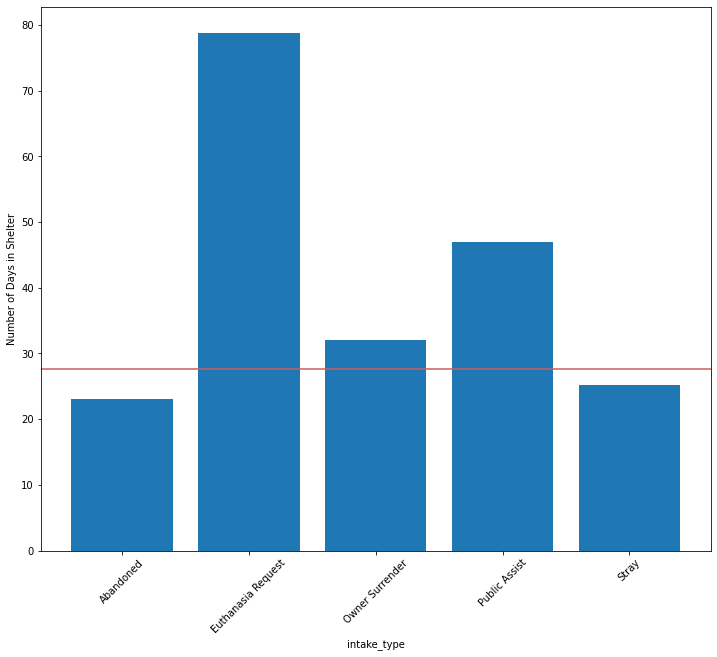

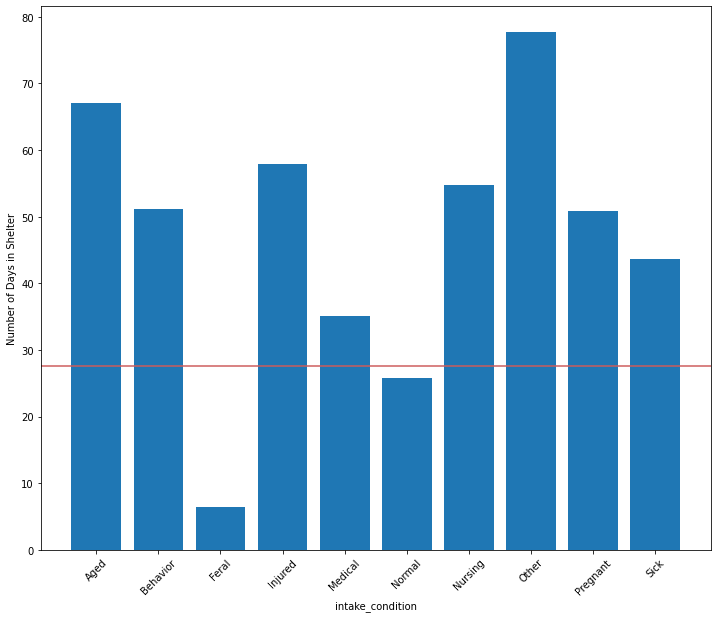

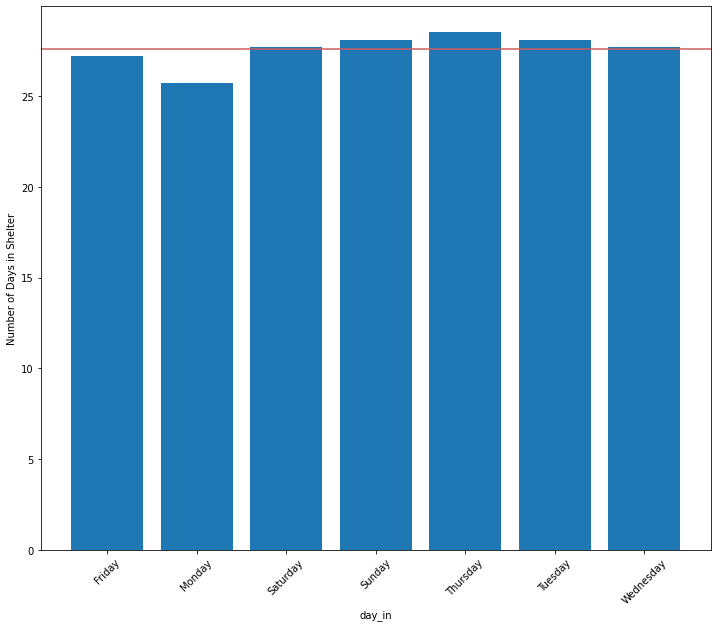

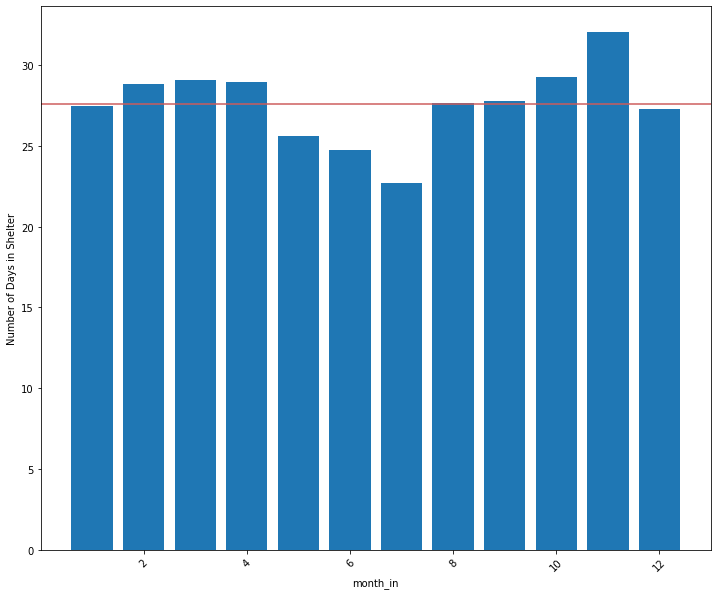

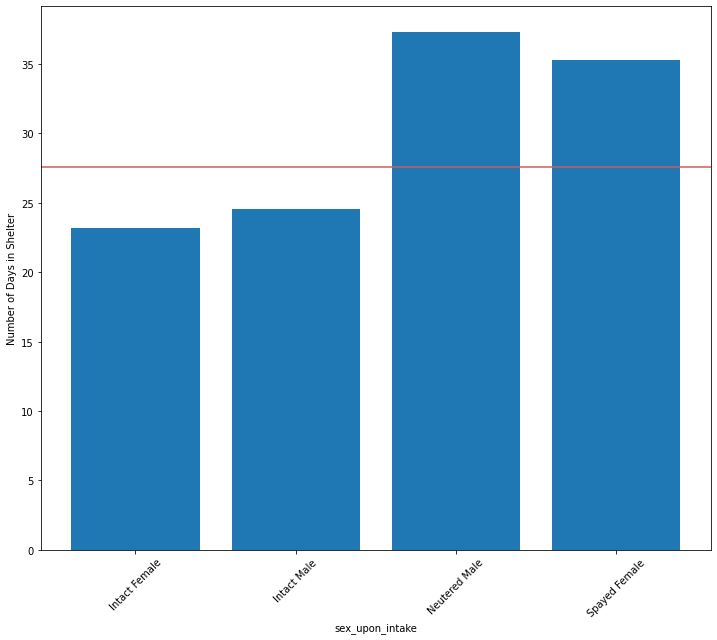

In [260]:
for col in interest_cols:
    col_series = dog['days_in_shelter'].groupby(dog[col]).mean()
    index = [index for index,value in col_series.items()]
    mean = [value for index,value in col_series.items()]
    plt.figure(figsize=(12,10))
    plt.bar(index,mean)
    plt.xticks(rotation=45)
    plt.axhline(y=dog['days_in_shelter'].mean(), color='indianred')
    plt.xlabel(col)
    plt.ylabel('Number of Days in Shelter')
    plt.show();

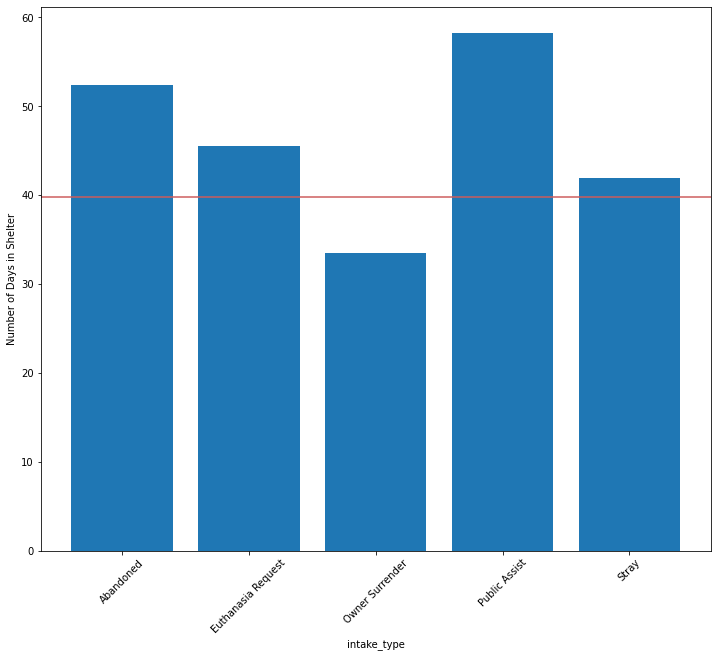

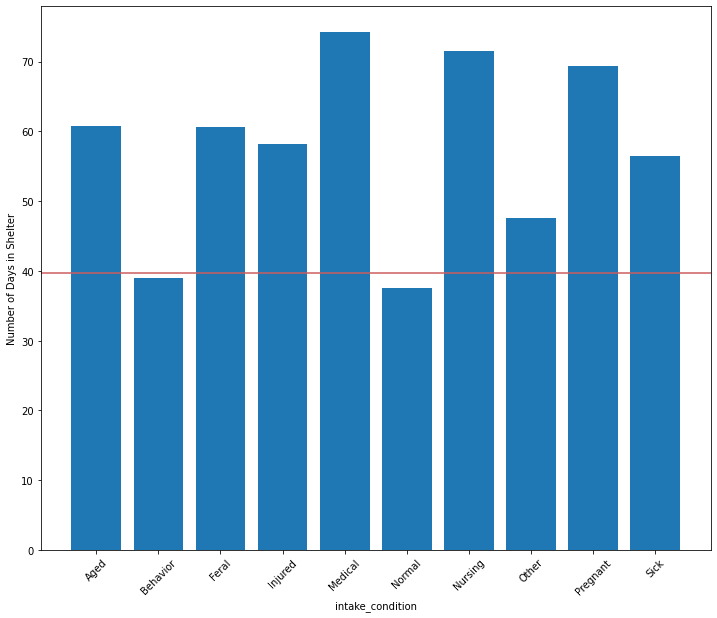

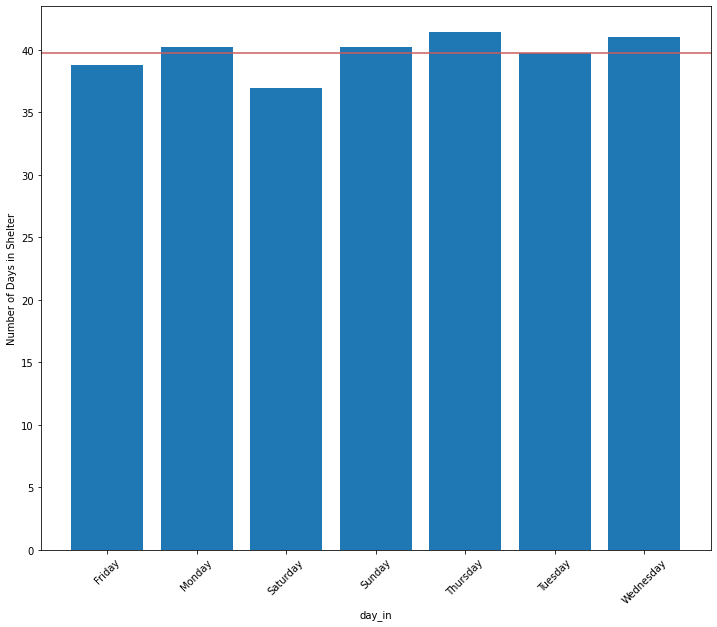

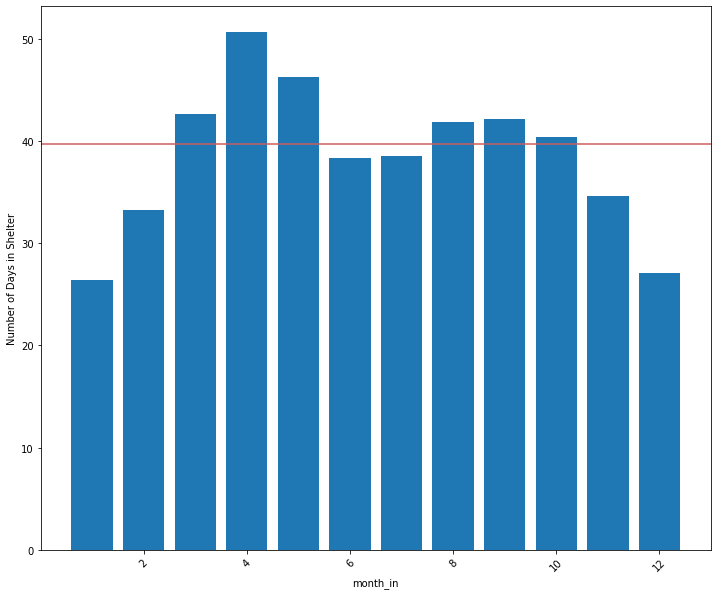

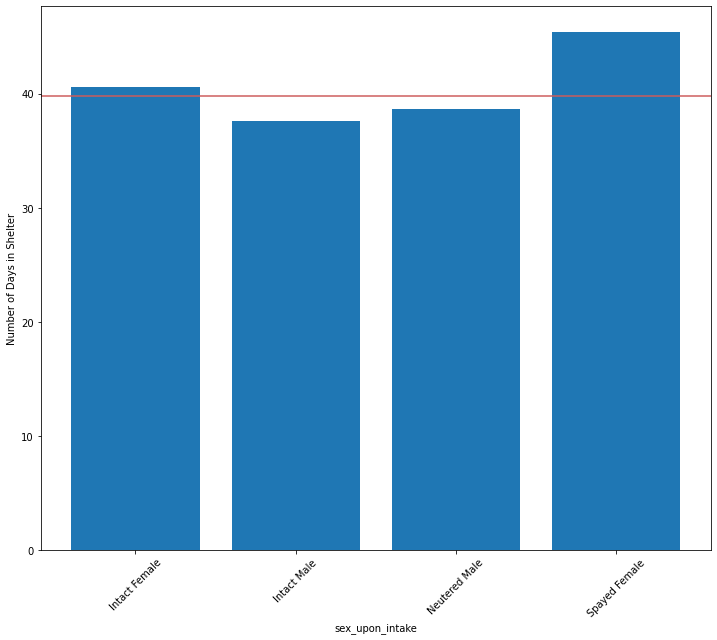

In [261]:
for col in interest_cols:
    col_series = cat['days_in_shelter'].groupby(cat[col]).mean()
    index = [index for index,value in col_series.items()]
    mean = [value for index,value in col_series.items()]
    plt.figure(figsize=(12,10))
    plt.bar(index,mean)
    plt.xticks(rotation=45)
    plt.axhline(y=cat['days_in_shelter'].mean(), color='indianred')
    plt.xlabel(col)
    plt.ylabel('Number of Days in Shelter')
    plt.show();